# Heatmap

In [3]:
import sys
import os
import numpy as np
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Especifica la ruta de la carpeta
ruta = r"C:\Users\agust\OneDrive\Projects\League Rival Scouting\Scraping Data Providers"

# Agrega la ruta al sistema de búsqueda
sys.path.append(ruta)

import pvd_Sofascore as sofascore

In [ ]:
players = [
    {'name': 'Rolando Ortiz', 'id': '994295'},
    {'name': 'Rodolfo Argüello', 'id': '1215106'},
    {'name': 'Ariel Suárez', 'id': '1438526'},
    {'name': 'Bryan Quiñóñez', 'id': '1194015'},
    {'name': 'Antonio de María', 'id': '1987146'},
    {'name': 'Felipe Coronel', 'id': '1117027'},
    {'name': 'Agustín Moreira', 'id': '1799336'},
    {'name': 'Ángel Aguilera', 'id': '1835870'}
    ]

In [27]:
sofascore.get_heatmap_from_players(players, delay=5)

No heatmap data found for player 994295 in league 11612 and season 63978.


,x,y,count,player_id,league_id,season_id
0,13,74,1,994295,480,47968
1,13,95,1,994295,480,47968
2,13,66,1,994295,480,47968
3,7,76,2,994295,480,47968
4,25,64,1,994295,480,47968
...,...,...,...,...,...,...
3429,15,62,1,1799336,278,58264
3430,15,5,1,1799336,278,58264
3431,17,15,1,1799336,278,58264
3432,14,57,1,1799336,278,58264


In [4]:
df = pd.read_csv('data\sofascore_heatmap.csv')

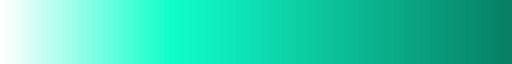

In [35]:
color0='#D8D8D8'
color1='#10FFCB'
color2='#088066'
color_white = '#FFFFFF'
color_line = '#7F7F7F'

# Crear el colormap personalizado con los porcentajes de inicio para cada color
cmap = LinearSegmentedColormap.from_list("CustomMap", [(0, color_white), (0.33, color1), (1, color2)], N=100)
cmap

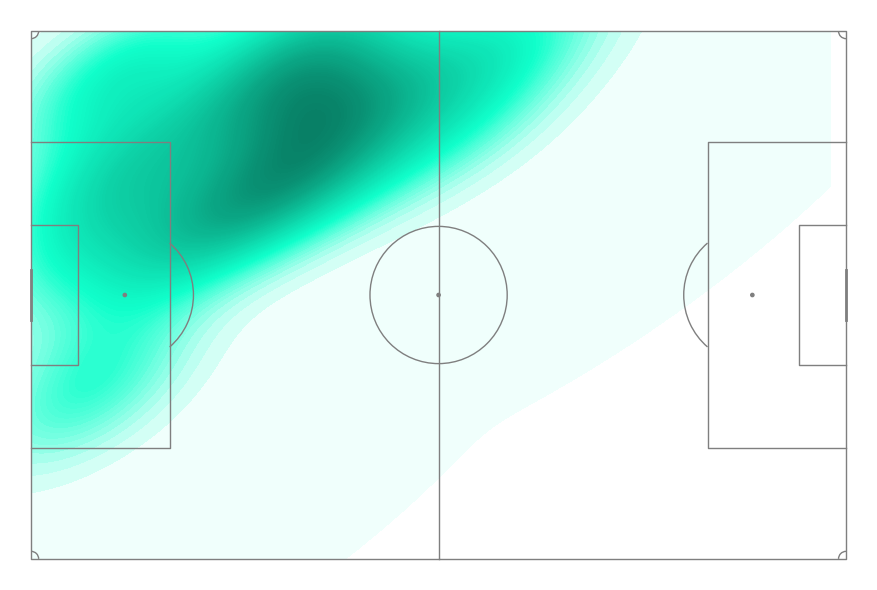

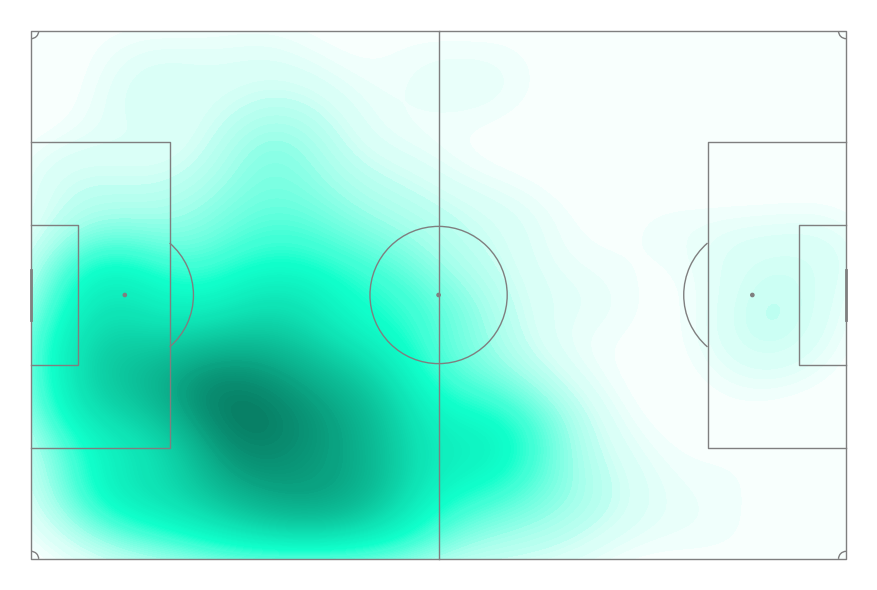

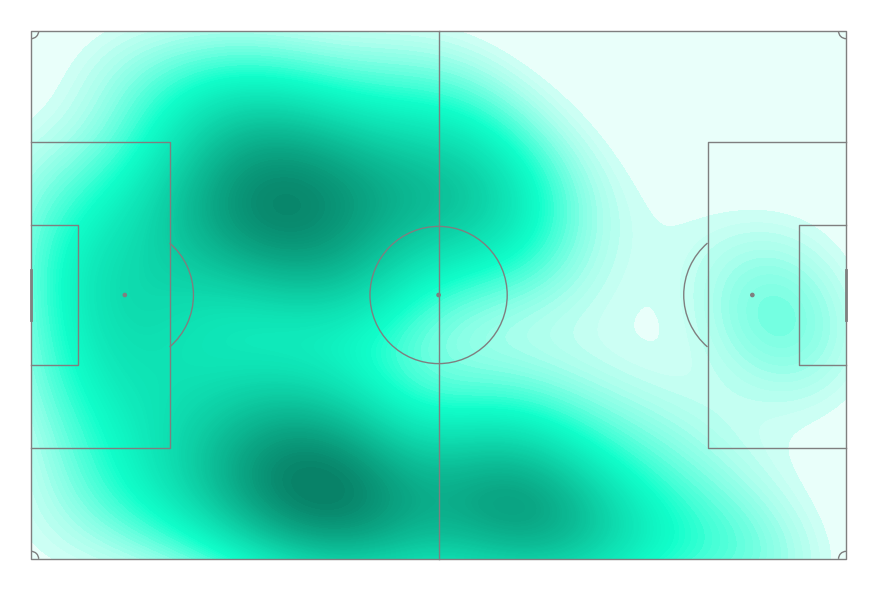

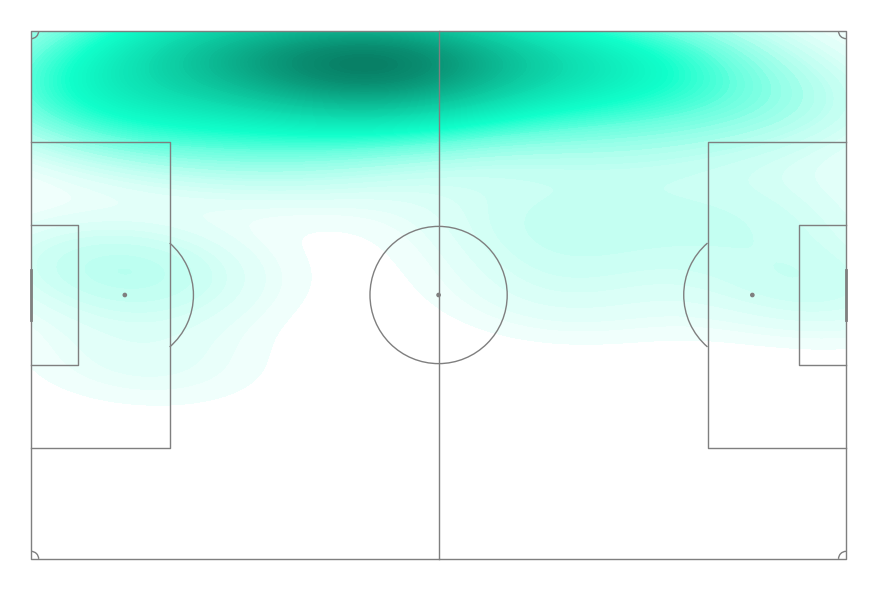

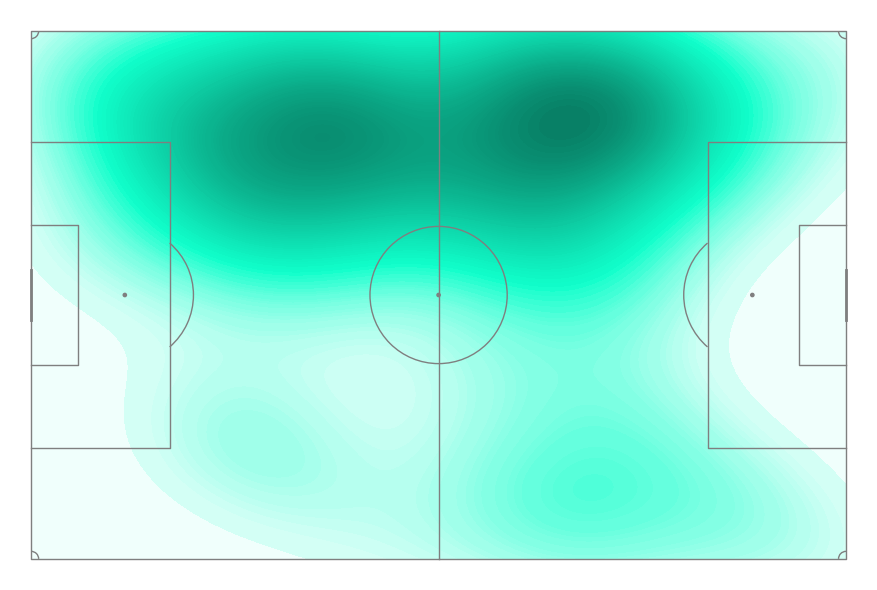

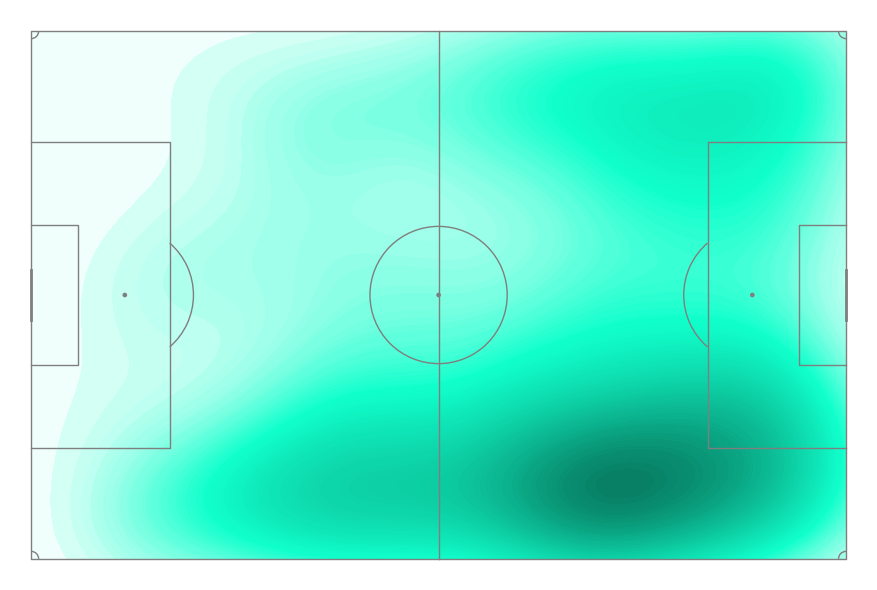

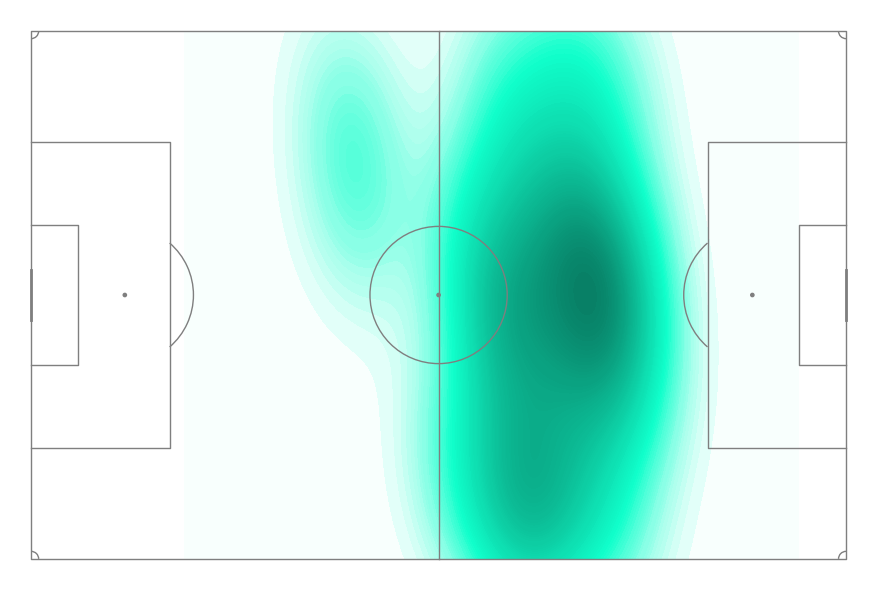

In [33]:
grouped = df.groupby('player_id')

for player_id, group in grouped:
    
    df_i = pd.DataFrame(group)

    # Crear un objeto Pitch
    pitch = Pitch(pitch_type='opta', corner_arcs=True, line_color=color_line, linewidth=1, line_zorder=2)

    # Crear la figura
    fig, ax = pitch.draw(figsize=(10, 6))

    # Crear el mapa de calor utilizando KDE plot
    kde = pitch.kdeplot(df_i['x'], df_i['y'], ax=ax,
                        fill=True, levels=np.linspace(0, 1, 100),
                        thresh=0.05,  # Umbral para valores bajos
                        cut=4,
                        cmap=cmap)
    
    filename = str(player_id) + ".png"
    folder = 'heatmap'
    file_path = os.path.join(folder, filename)
    plt.savefig(file_path, dpi=300, bbox_inches='tight')

In [36]:
from mplsoccer import Pitch
import os
import numpy as np
import matplotlib.pyplot as plt

grouped = df.groupby('player_id')

for player_id, group in grouped:
    
    df_i = pd.DataFrame(group)

    # Definir el color de las líneas (RGBA)
    color_line = (1, 1, 1, 1)  # Blanco con 50% de transparencia

    # Crear un objeto Pitch con líneas transparentes
    pitch = Pitch(pitch_type='opta', corner_arcs=True, line_color=color_line, linewidth=1, line_zorder=2)

    # Crear la figura
    fig, ax = pitch.draw(figsize=(10, 6))
    
    # Hacer el fondo de la figura transparente
    fig.patch.set_alpha(0)  # Fondo de la figura
    ax.set_facecolor('none')  # Fondo del eje

    # Crear el mapa de calor utilizando KDE plot
    kde = pitch.kdeplot(df_i['x'], df_i['y'], ax=ax,
                        fill=True, levels=np.linspace(0, 1, 100),
                        thresh=0.05,  # Umbral para valores bajos
                        cut=4,
                        cmap=cmap)
    
    # Guardar la figura con fondo transparente
    filename = str(player_id) + ".png"
    folder = 'heatmap'
    if not os.path.exists(folder):
        os.makedirs(folder)
    file_path = os.path.join(folder, filename)
    plt.savefig(file_path, dpi=300, bbox_inches='tight', transparent=True)  # Fondo transparente
    plt.close(fig)
